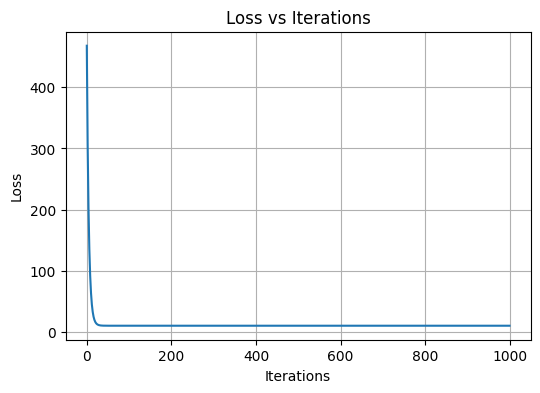

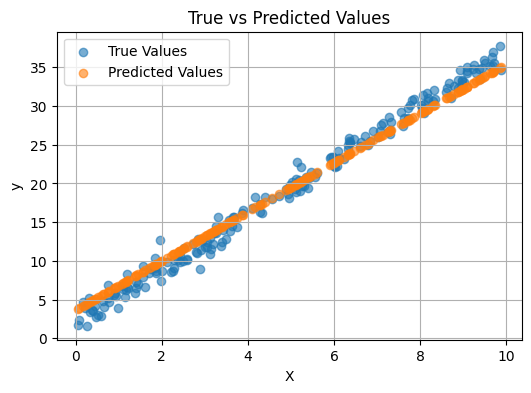

Learned weight: [9.33854536]
Learned bias: 19.007632431657903


In [2]:
# -------Question 1-------

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_samples = 200
X = np.random.rand(n_samples, 1) * 10 
true_w = 3.5
true_b = 2.0
noise = np.random.randn(n_samples, 1)

y = true_w * X + true_b + noise

#  Manual StandardScaler Implementation

class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        """
        Compute mean and standard deviation for each feature
        """
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        """
        Standardize the dataset
        """
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        """
        Fit to data, then transform it
        """
        self.fit(X)
        return self.transform(X)


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Linear Regression with L2 Regularization (Ridge)

class LinearRegressionRidge:
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_=0.1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        """
        Train model using gradient descent
        """
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros((n_features, 1))
        self.b = 0.0

        for _ in range(self.n_iters):
            # Forward pass
            y_pred = X @ self.w + self.b

            # Compute error
            error = y - y_pred

            # Mean Squared Error
            mse = np.mean(error ** 2)

            # L2 regularization term 
            l2_penalty = self.lambda_ * np.sum(self.w ** 2)

            # Total loss
            loss = mse + l2_penalty
            self.losses.append(loss)

            # Gradients
            dw = (-2 / n_samples) * (X.T @ error) + 2 * self.lambda_ * self.w
            db = (-2 / n_samples) * np.sum(error)

            # Parameter update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b

#  Train the Model


model = LinearRegressionRidge(
    learning_rate=0.05,
    n_iters=1000,
    lambda_=0.1
)

model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

#  Plot Loss vs Iterations

plt.figure(figsize=(6, 4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid(True)
plt.show()

#  Plot True vs Predicted Values


plt.figure(figsize=(6, 4))
plt.scatter(X, y, label="True Values", alpha=0.6)
plt.scatter(X, y_pred, label="Predicted Values", alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.title("True vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# 7. Print Learned Parameters
print("Learned weight:", model.w.flatten())
print("Learned bias:", model.b)


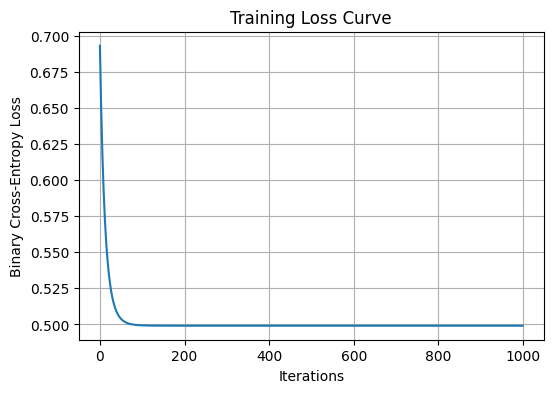

Final Training Accuracy: 0.9633
Learned weights: [ 0.59066106 -0.79572698]
Learned bias: 0.24392837674852283


In [3]:
# Generate Binary Classification Dataset

np.random.seed(42)

n_samples = 300
X = np.random.randn(n_samples, 2)

# True parameters
true_w = np.array([[2.0], [-3.0]])
true_b = 0.5

logits = X @ true_w + true_b
probabilities = 1 / (1 + np.exp(-logits))
y = (probabilities > 0.5).astype(int)

# Manual StandardScaler (Reuse)

class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression with L2 Regularization


class LogisticRegressionRidge:
    def __init__(self, learning_rate=0.1, n_iters=1000, lambda_=0.1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.w = None
        self.b = None
        self.losses = []

    def sigmoid(self, z):
        """
        Sigmoid activation function
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train logistic regression using gradient descent
        """
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)

        # Initialize parameters
        self.w = np.zeros((n_features, 1))
        self.b = 0.0

        for _ in range(self.n_iters):
            # Linear combination
            z = X @ self.w + self.b

            # Sigmoid activation
            y_pred = self.sigmoid(z)

            # Binary Cross-Entropy Loss
            epsilon = 1e-8  # for numerical stability
            bce_loss = -np.mean(
                y * np.log(y_pred + epsilon) +
                (1 - y) * np.log(1 - y_pred + epsilon)
            )

            # L2 regularization term (do NOT regularize bias)
            l2_penalty = self.lambda_ * np.sum(self.w ** 2)

            # Total loss
            loss = bce_loss + l2_penalty
            self.losses.append(loss)

            # Gradients
            error = y_pred - y
            dw = (1 / n_samples) * (X.T @ error) + 2 * self.lambda_ * self.w
            db = (1 / n_samples) * np.sum(error)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return self.sigmoid(X @ self.w + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Train the Model

model = LogisticRegressionRidge(
    learning_rate=0.1,
    n_iters=1000,
    lambda_=0.1
)

model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# 5. Training Loss Curve


plt.figure(figsize=(6, 4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

# 6. Final Accuracy


accuracy = np.mean(y_pred.flatten() == y.flatten())
print(f"Final Training Accuracy: {accuracy:.4f}")

# 7. Learned Parameters

print("Learned weights:", model.w.flatten())
print("Learned bias:", model.b)


In [4]:

np.random.seed(42)

n, m = 6, 6
M = np.random.randn(n, m)

k = 3  # number of clusters

# K-Means Clustering for Matrix Elements


class KMeansMatrix:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None

    def fit(self, M):
        """
        Perform K-Means clustering on individual elements of matrix M
        """
        n, m = M.shape

        # Step 1: Flatten matrix into 1D array of values

        values = M.flatten()

        # Step 2: Initialize centroids (random elements)

        random_indices = np.random.choice(len(values), self.k, replace=False)
        self.centroids = values[random_indices]

     
        # Step 3: Iterate until convergence
 
        for _ in range(self.max_iters):

            # Assignment step
            distances = np.abs(values[:, None] - self.centroids[None, :])
            labels = np.argmin(distances, axis=1)

            # Update step
            new_centroids = np.array([
                values[labels == i].mean() if np.any(labels == i) else self.centroids[i]
                for i in range(self.k)
            ])

            # Convergence check
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

        # Step 4: Reshape labels back to matrix

        assignment_table = labels.reshape(n, m)


        # Step 5: Build cookbook dictionary

        cookbook = {i: [] for i in range(self.k)}

        for i in range(n):
            for j in range(m):
                cluster_id = assignment_table[i, j]
                cookbook[cluster_id].append((i, j))

        return assignment_table, cookbook, self.centroids

#  Run K-Means


kmeans = KMeansMatrix(k=k)
assignment_table, cookbook, centroids = kmeans.fit(M)

#  Display Results


print("Original Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)

print("\nCookbook:")
for cluster_id, positions in cookbook.items():
    print(f"Cluster {cluster_id}: {positions}")


Original Matrix M:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365]]

Assignment Table:
 [[2 2 2 1 2 2]
 [1 2 0 2 0 0]
 [2 0 0 0 0 2]
 [0 0 1 2 2 0]
 [0 2 0 2 0 2]
 [0 1 2 0 2 0]]

Centroids:
 [-0.97083067  1.60504241  0.20311118]

Cookbook:
Cluster 0: [(1, 2), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 5), (4, 0), (4, 2), (4, 4), (5, 0), (5, 3), (5, 5)]
Cluster 1: [(0, 3), (1, 0), (3, 2), (5, 1)]
Cluster 2: [(0, 0), (0, 1), (0, 2), (0, 4), (0, 5), (1, 1), (1, 3), (2, 0), (2, 5), (3, 3), (3, 4), (4, 1), (4, 3), (4, 5), (5, 2), (5, 4)]
